# Supermarket sales data exploration
In this notebook I want to explore *supermarket sales* to improve their performance. Dataset was downloaded from Kaggle: https://www.kaggle.com/datasets/akashbommidi/super-market-sales

## Data understanding and cleaning

In [13]:
import pandas as pd

df = pd.read_csv(r"data/supermarket_sales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


As we can see, dataset has some useless information as "Invoice ID" and "Branch", which we can easily drop.  

In [14]:
df.drop(axis = 1, columns = ["Invoice ID","Branch"], inplace = True)
df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Let's explore statistical values 

In [17]:
df.describe() # To describe dataset

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [18]:
print(df.isnull().sum()) # Let's check if we have missing values

City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


As we can see, we don't have missing values
# Data analysis and visualization
Let's dive into data deeply and find interesting relations

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

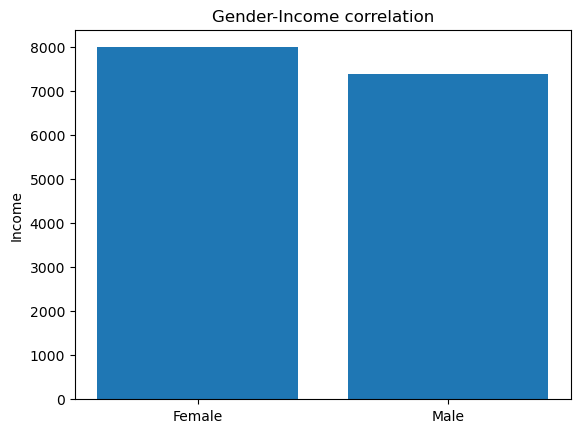

In [129]:
# Lets find out if any gender is spending more money in our market
Top_gender = df.groupby(["Gender"])[["gross income"]].sum().sort_values("gross income", ascending=False)
plt.title("Gender-Income correlation")
plt.ylabel('Income')
plt.bar(Top_gender.index, Top_gender["gross income"])
plt.show()

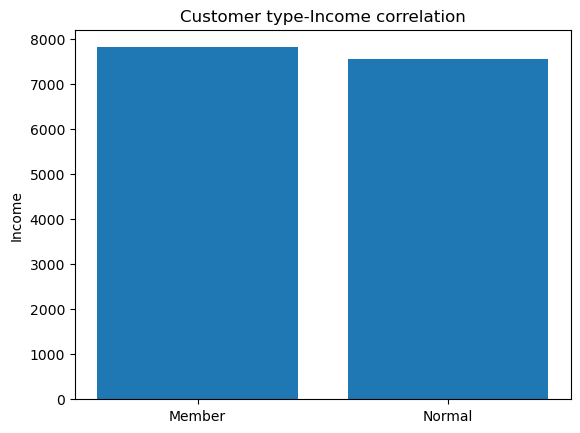

In [130]:
# Let's see if customer type has an influence
Top_customer = df.groupby(["Customer type"])[["gross income"]].sum().sort_values("gross income", ascending=False)

plt.title("Customer type-Income correlation")
plt.ylabel("Income")
plt.bar(Top_customer.index, Top_customer['gross income'])
plt.show()

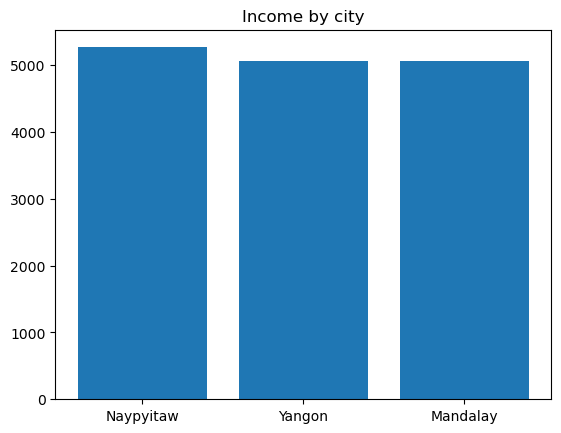

In [131]:
# Let's see if any city has more income than others
Top_city = df.groupby(["City"])[["gross income"]].sum().sort_values("gross income", ascending=False)

plt.title('Income by city')
plt.bar(Top_city.index, Top_city["gross income"])
plt.show()

In [132]:
pd.unique(df['Product line']) # Which kind of products we have

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

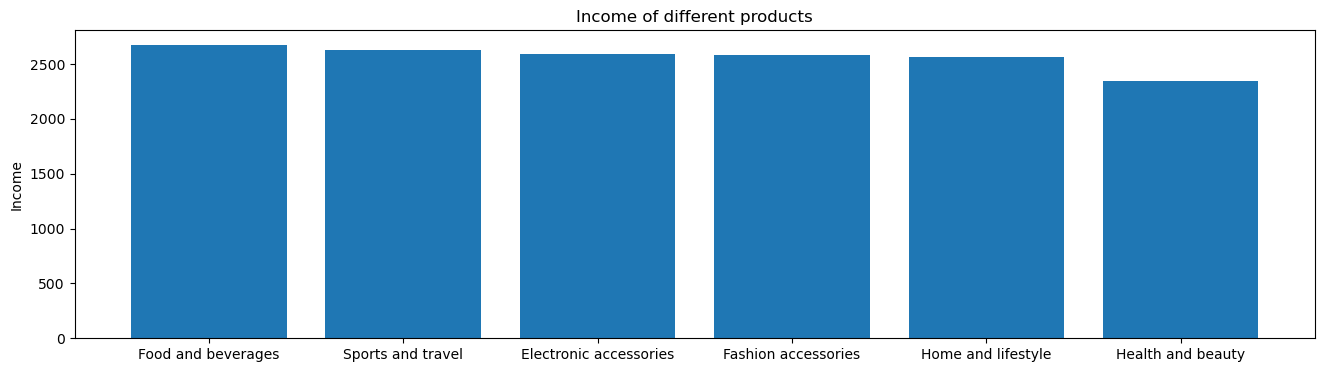

In [133]:
Top_product = df.groupby(["Product line"])[["gross income"]].sum().sort_values("gross income", ascending=False)

plt.figure(figsize=(16, 4))
plt.title('Income of different products')
plt.ylabel('Income')
plt.bar(Top_product.index, Top_product["gross income"])
plt.show()

#### From all the comparisons above we can see that they are mostly equally distributed. So let's find some more interesting reations

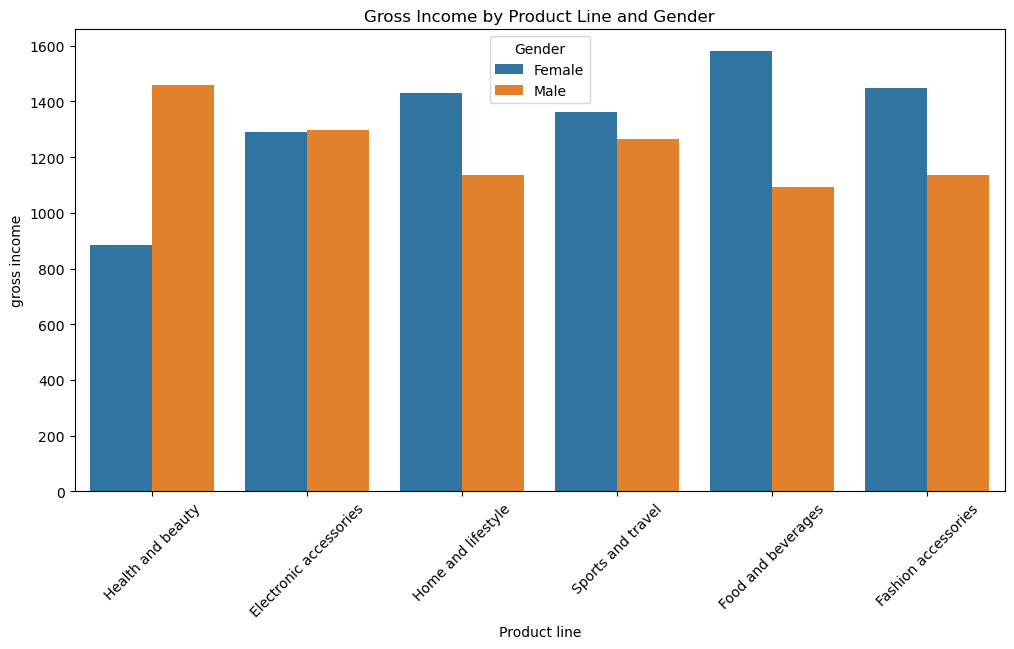

In [126]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Product line", y="gross income", hue="Gender", estimator=sum, errorbar=None)
plt.title("Gross Income by Product Line and Gender")
plt.xticks(rotation=45)
plt.show()

### Here we have some more interesting instances:
While male customers buy more "Health and beauty" products, female customers buy more "Fashion accessories", "Food and beverages", "Home and lifestyle" products than Male customers.

### What about week days?
Let's compare sales of different product types depending on week days

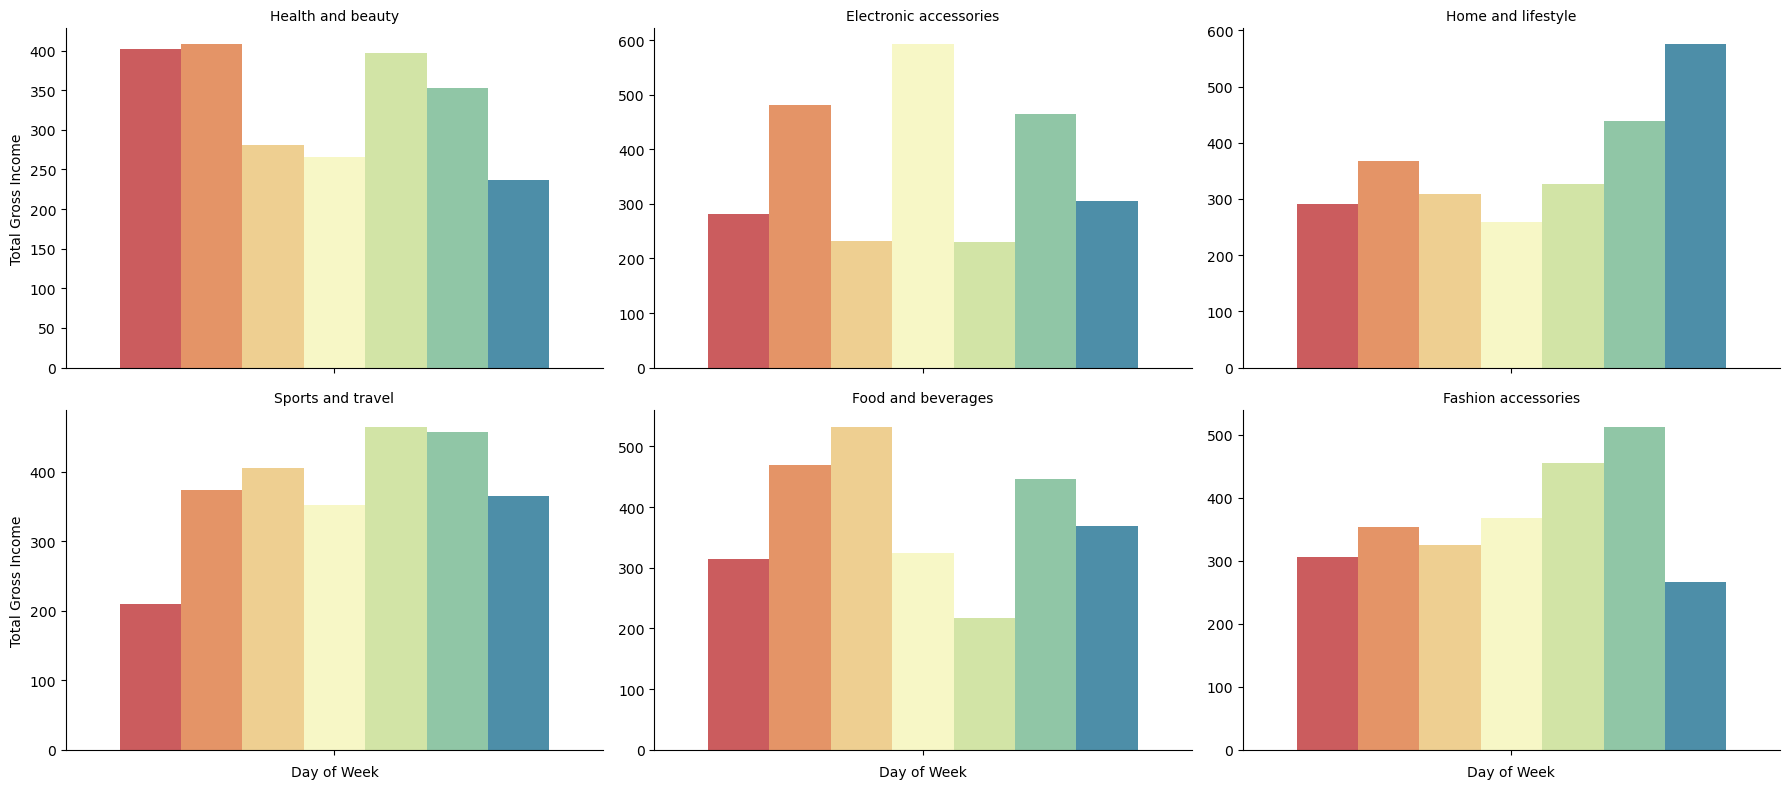

In [147]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day_name()

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df['Day'] = pd.Categorical(df['Day'], categories=days_order, ordered=True)

g = sns.FacetGrid(df, col="Product line", col_wrap=3, height=4, aspect=1.5, sharey=False)

g.map_dataframe(sns.barplot, hue="Day", y="gross income", estimator=sum, errorbar=None, palette="Spectral")

g.set_axis_labels("Day of Week", "Total Gross Income")
g.set_titles(col_template="{col_name}")
g.set_xticklabels(rotation=45)

plt.tight_layout()
plt.show()

Here we can tell about peak days for each week day (e.g. Electronic accessories are popular on Thursdays, of people buy more "Home and lifestyle" and "Fashion accessories" products on weekends)